<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

------


### OBJECTIVES

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save the model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sequential allows us to build neural networks by stacking layers linearly
from tensorflow.keras.models import Sequential

# Import core layer types from Keras:
# - Dense: Standard fully-connected neural network layer
# - Dropout: Randomly sets input units to 0 during training (prevents overfitting)
# - BatchNormalization: Normalizes and scales inputs for each mini-batch (improves training stability)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

# Import regularization functions from Keras:
# - l1: Lasso Regularization (adds absolute value of weights to loss)
# - l2: Ridge Regularization (adds squared value of weights to loss) 
# - l1_l2: Elastic Net Regularization (combines both l1 and l2)
# All of these help prevent overfitting by penalizing large weights
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [4]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

- Load in the California housing data into a Pandas DataFrame called `cali_df`.
- Add the target as a column named `price`

In [6]:
cali_df = pd.DataFrame(data=cali.data, columns=cali.feature_names)

In [7]:
cali_df['price'] = cali.target

In [8]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
cali_df.columns
# average income,housing average age, average rooms, average bedrooms, population,
# average occupation, latitude, and longitude

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

### Part 2

- Create `X` from selected features (your choice) and set `y` as the `price` column
- Split `X` and y into training and test sets

In [11]:
X = cali_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]
y = cali_df['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
X_train.shape, X_test.shape

((16512, 6), (4128, 6))

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [16]:
model = Sequential(
    [Input(shape=(X_train.shape[1],)),  
    Dense(24, activation='relu'),      
    Dense(1, activation='linear')      
])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

`Compile` the network using an adam optimizer and appropriate loss function with the mean squared error metric.

In [19]:
model.compile(optimizer='adam',loss = 'mse',metrics = ['mae'])

### Part 4

Fit the model on the training data with 100 epochs (and suppress the output with `verbose = 0`). Save the fit model to the variable `history`.

In [21]:
hist = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=100,verbose=0)

### Part 5

Use matplotlib to create side-by-side subplots showing:

- Training loss vs validation loss
- Training mean squared error vs validation mean squared error
- You can plot these metrics from the training history.

In [23]:
hist.history

{'loss': [1.732527494430542,
  0.6456605195999146,
  0.5342130661010742,
  0.5013752579689026,
  0.4873766303062439,
  0.4786450266838074,
  0.4747394919395447,
  0.46622055768966675,
  0.4613536298274994,
  0.45801931619644165,
  0.4551534354686737,
  0.44870710372924805,
  0.44463738799095154,
  0.44102659821510315,
  0.4405374526977539,
  0.4354014992713928,
  0.4344538748264313,
  0.43675631284713745,
  0.43188488483428955,
  0.4287247359752655,
  0.4278031885623932,
  0.42935895919799805,
  0.439510703086853,
  0.42419692873954773,
  0.42277514934539795,
  0.4211697578430176,
  0.42089948058128357,
  0.4210045635700226,
  0.4202623963356018,
  0.4224839210510254,
  0.4169940948486328,
  0.4210856258869171,
  0.41709664463996887,
  0.4170910716056824,
  0.41930973529815674,
  0.41925033926963806,
  0.4183715581893921,
  0.41724780201911926,
  0.41656169295310974,
  0.41686874628067017,
  0.41538506746292114,
  0.41503772139549255,
  0.4156557321548462,
  0.41358059644699097,
  0.41

In [24]:
hist.history.keys()

training_loss = hist.history['loss']
validation_loss = hist.history['val_loss']

training_mae = hist.history['mae']
validation_mae = hist.history['val_mae']

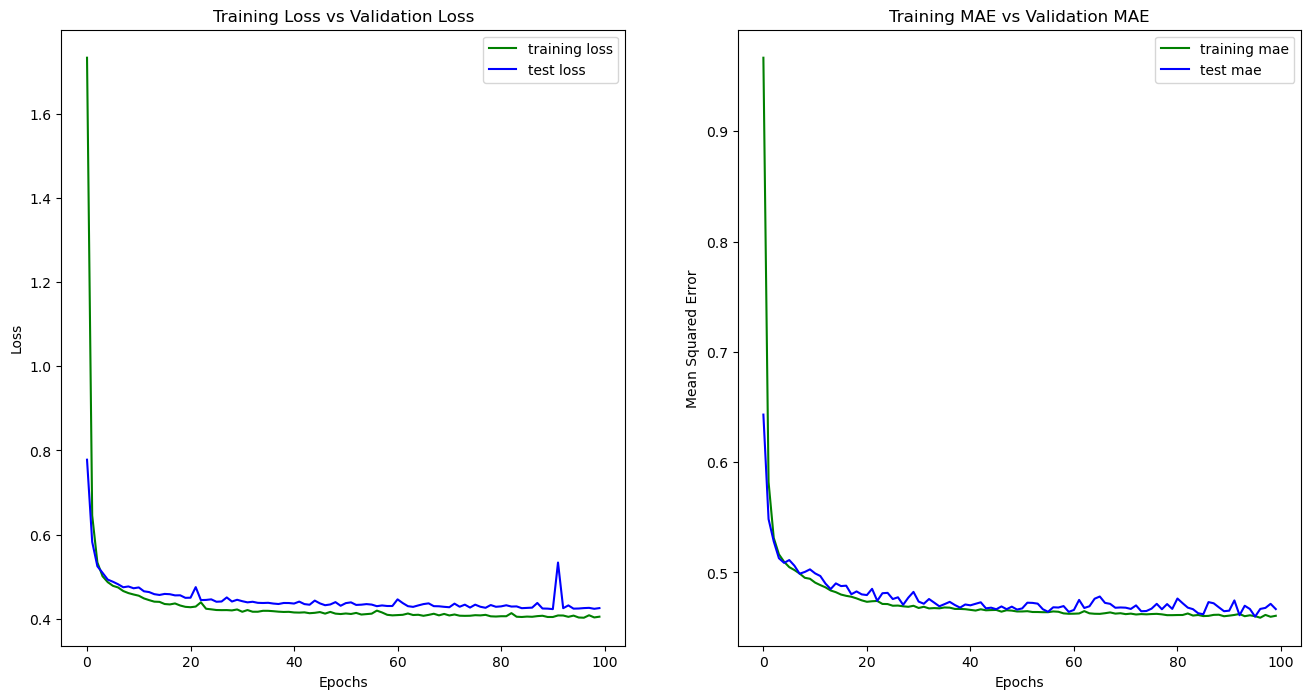

In [25]:
plt.figure(figsize=(16, 8))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, c='g', label = 'training loss')
plt.plot(validation_loss, c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs Validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(training_mae, c='g', label = 'training mae')
plt.plot(validation_mae, c='b', label ='test mae')
plt.legend();
plt.title('Training MAE vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

### Part 6

Create a second, deeper network with the following architecture:

- First hidden layer: 64 nodes with ReLU activation
- Second hidden layer: 128 nodes with ReLU activation
- Third hidden layer: 64 nodes with ReLU activation
- Output layer: [appropriate nodes for your classification task]

In [27]:
model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),      
    Dense(128, activation='relu'),     
    Dense(64, activation='relu'),      
    Dense(1, activation='linear')    
])

In [28]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,089 (66.75 KB)

 Trainable params: 17,089 (66.75 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_2.compile(optimizer='adam',loss='mse',metrics=['mae'])   

In [30]:
hist_2 = model_2.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=100,verbose=0)

In [31]:
hist_2.history.keys()

training_loss_2 = hist_2.history['loss']
validation_loss_2 = hist_2.history['val_loss']

training_mae_2 = hist_2.history['mae']
validation_mae_2 = hist_2.history['val_mae']

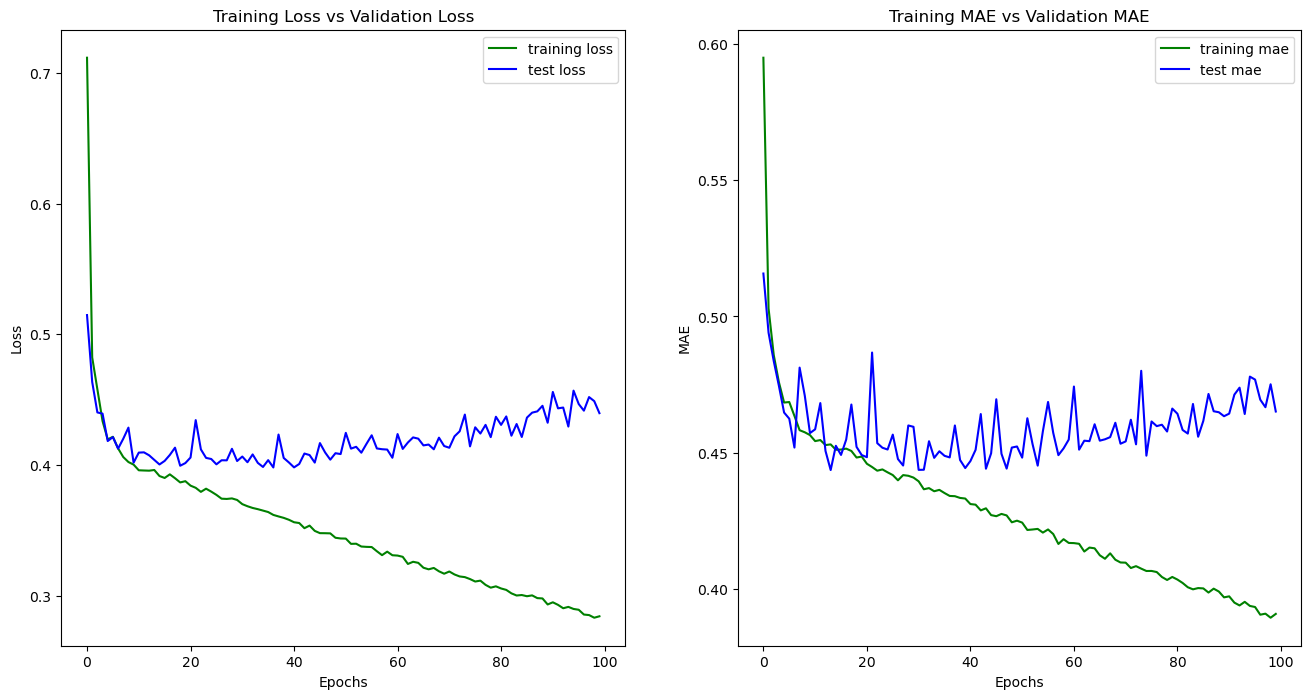

In [32]:
plt.figure(figsize=(16, 8))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss_2, c='g', label = 'training loss')
plt.plot(validation_loss_2, c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs Validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(training_mae_2, c='g', label = 'training mae')
plt.plot(validation_mae_2, c='b', label ='test mae')
plt.legend();
plt.title('Training MAE vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

### Part 7

Add a `BatchNormalization` layer before the first dense layer and retrain the model with the same parameters as before.

##### Does this change anything?

In [35]:
model_bn = Sequential([
    Input(shape=(X_train.shape[1],)),  
    BatchNormalization(),
    Dense(64, activation='relu'),      
    Dense(128, activation='relu'),     
    Dense(64, activation='relu'),      
    Dense(1, activation='linear')    
])

In [36]:
model_bn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,113 (66.85 KB)

 Trainable params: 17,101 (66.80 KB)

 Non-trainable params: 12 (48.00 B)

In [37]:
model_bn.compile(optimizer='adam',loss='mse',metrics=['mae'])           

In [38]:
hist_bn = model_bn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [39]:
hist_bn.history.keys()

training_loss_bn = hist_bn.history['loss']
validation_loss_bn = hist_bn.history['val_loss']

training_mae_bn = hist_bn.history['mae']
validation_mae_bn = hist_bn.history['val_mae']

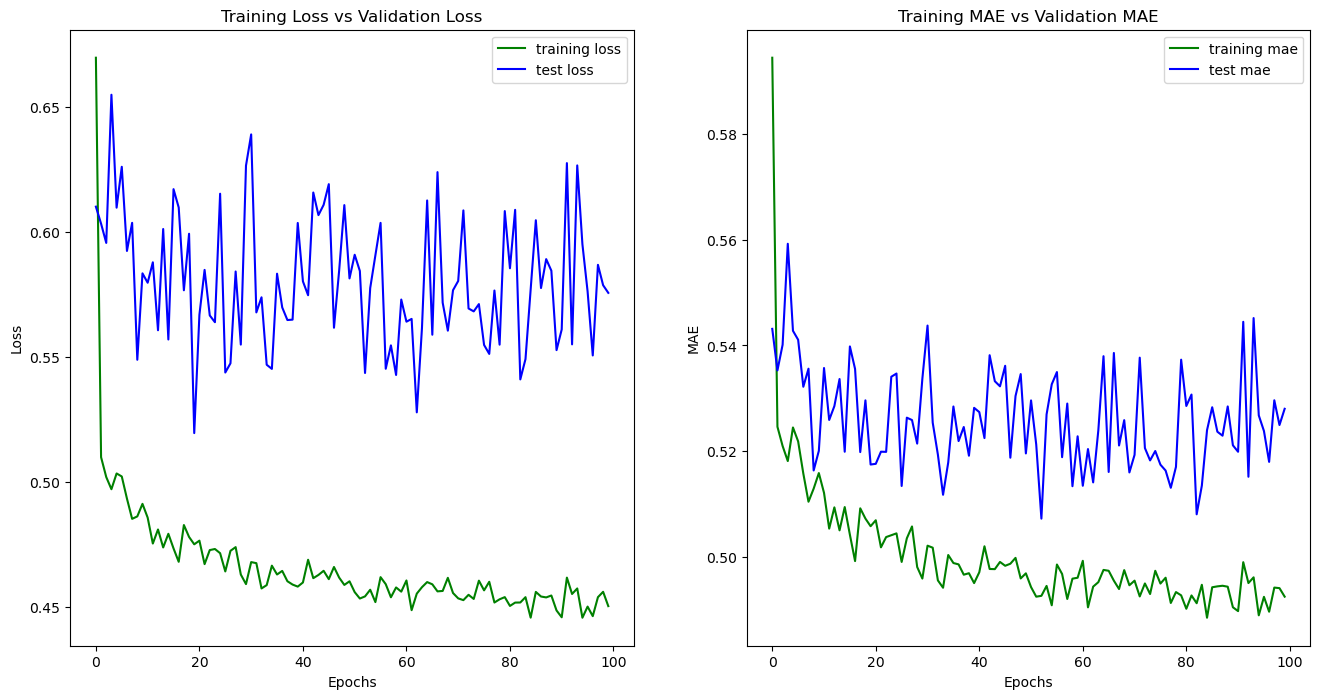

In [40]:
plt.figure(figsize=(16, 8))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss_bn, c='g', label = 'training loss')
plt.plot(validation_loss_bn, c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs Validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(training_mae_bn, c='g', label = 'training mae')
plt.plot(validation_mae_bn, c='b', label ='test mae')
plt.legend();
plt.title('Training MAE vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

### Part 8

**Early Stopping**  

Do we need 100 epochs to effectively train the data?  

- Iterate to now include an `EarlyStopping` callback in your model above.  
- Set the `patience` equal to 5.  


In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,verbose=1)   

In [44]:
hist_es = model_bn.fit(X_train, y_train, epochs=100, verbose=0, 
                       validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 6.


In [45]:
hist_es.history.keys()

training_loss_es = hist_es.history['loss']
validation_loss_es = hist_es.history['val_loss']

training_mae_es = hist_es.history['mae']
validation_mae_es = hist_es.history['val_mae']

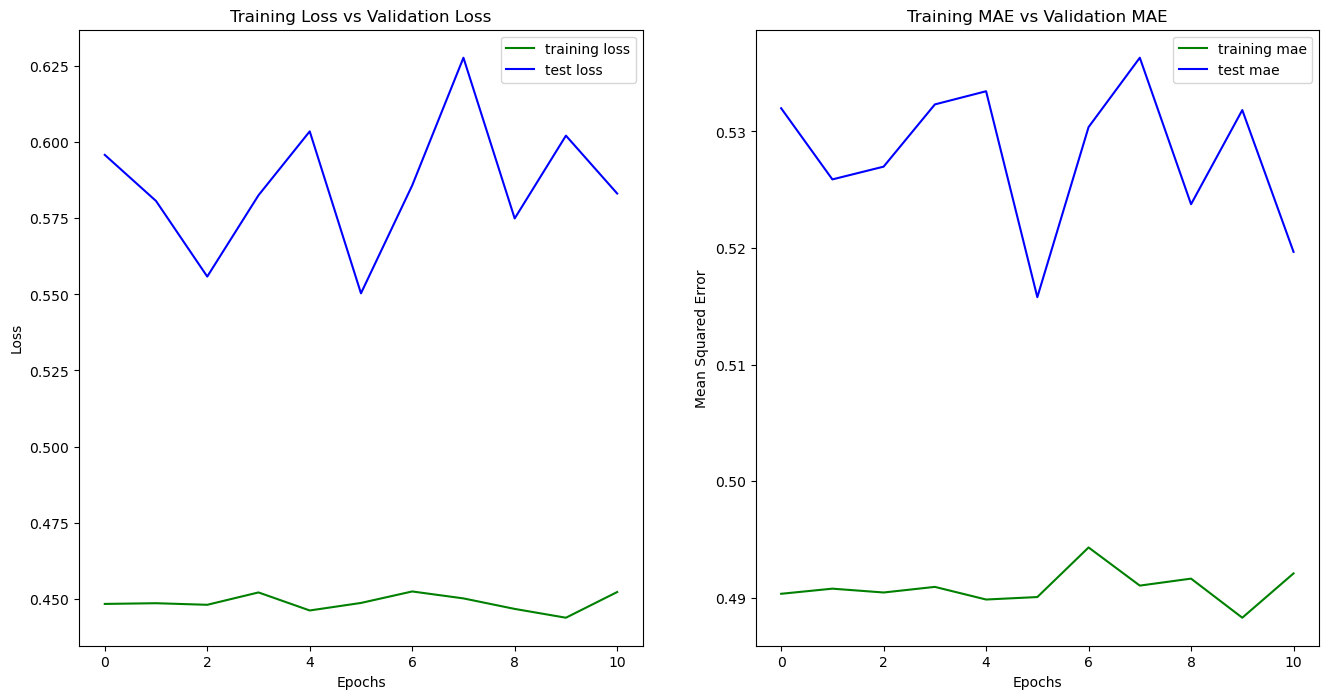

In [46]:
plt.figure(figsize=(16, 8))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss_es, c='g', label = 'training loss')
plt.plot(validation_loss_es, c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs Validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(training_mae_es, c='g', label = 'training mae')
plt.plot(validation_mae_es, c='b', label ='test mae')
plt.legend();
plt.title('Training MAE vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

**How many epochs do you think are appropriate?**

### Part 9

**Dropout**  

- Add dropout layers to the model:
   - 5% dropout after the second layer
   - 20% dropout after the third layer
   - Train the model to compare **performance and convergence time**

In [49]:
model_do = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(64, activation='relu'),  
    Dense(128, activation='relu'), 
    Dropout(0.05), # 5% Dropout 
    Dense(64, activation='relu'), 
    Dropout(0.20), # 20% Dropout
    Dense(1, activation='sigmoid')  
])

In [50]:
model_do.compile(optimizer='adam',loss='mse',metrics=['mae'])           

In [51]:
hist_do = model_do.fit(X_train, y_train, epochs=10, verbose=0, batch_size=32,
                       validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


In [52]:
hist_do.history.keys()

training_loss_do = hist_do.history['loss']
validation_loss_do = hist_do.history['val_loss']

training_mae_do = hist_do.history['mae']
validation_mae_do = hist_do.history['val_mae']

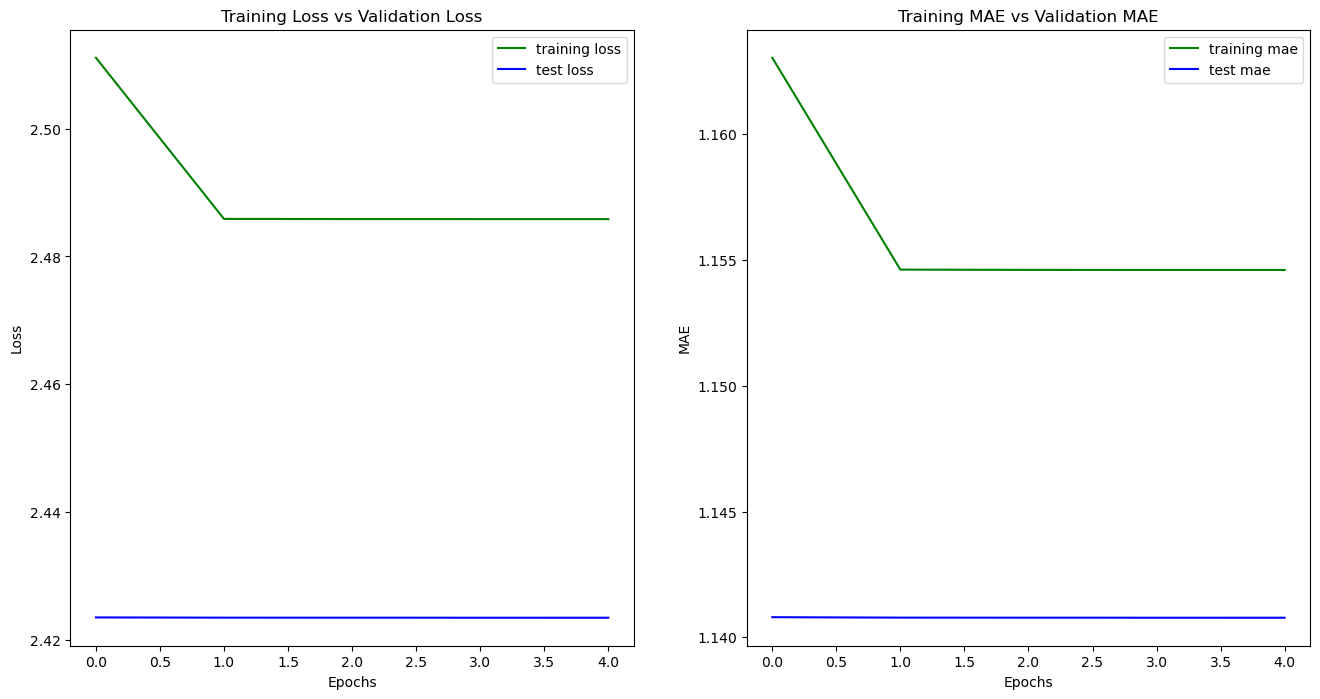

In [53]:
plt.figure(figsize=(16, 8))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss_do, c='g', label = 'training loss')
plt.plot(validation_loss_do, c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs Validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(training_mae_do, c='g', label = 'training mae')
plt.plot(validation_mae_do, c='b', label ='test mae')
plt.legend();
plt.title('Training MAE vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

### Part 9 - continued: RMSE vs. Baseline

Calculate and compare the RMSE of both the baseline model and your optimized model.

In [55]:
from sklearn.metrics import root_mean_squared_error

# Baseline Prediction
y_baseline = model.predict(X_test)

# Optimized Model Predictions
y_optimized = model_do.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


In [56]:
# RMSE 
print(f'Baseline RMSE{root_mean_squared_error(y_test, y_baseline)}')
print(f'Optimized RMSE{root_mean_squared_error(y_test, y_optimized)}')

Baseline RMSE0.6524832297747286
Optimized RMSE1.5567558755219844


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  

- Create a model with the same architecture and dropout layers
- Add l2 regularization (0.01) to **each** dense layer
- Calculate the RMSE and compare it against the baseline model

In [58]:
model_reg = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(128, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)),   
    Dense(128, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)),  
    Dense(1, activation='linear') 
])

model_reg.compile(optimizer='adam',loss='mse',metrics=['mae'])  

hist_reg = model_reg.fit(X_train, y_train,epochs=100, verbose=0,
                         validation_data=(X_test, y_test))

In [59]:
hist_reg.history.keys()

training_loss_reg = hist_reg.history['loss']
validation_loss_reg = hist_reg.history['val_loss']

training_mae_reg = hist_reg.history['mae']
validation_mae_reg = hist_reg.history['val_mae']

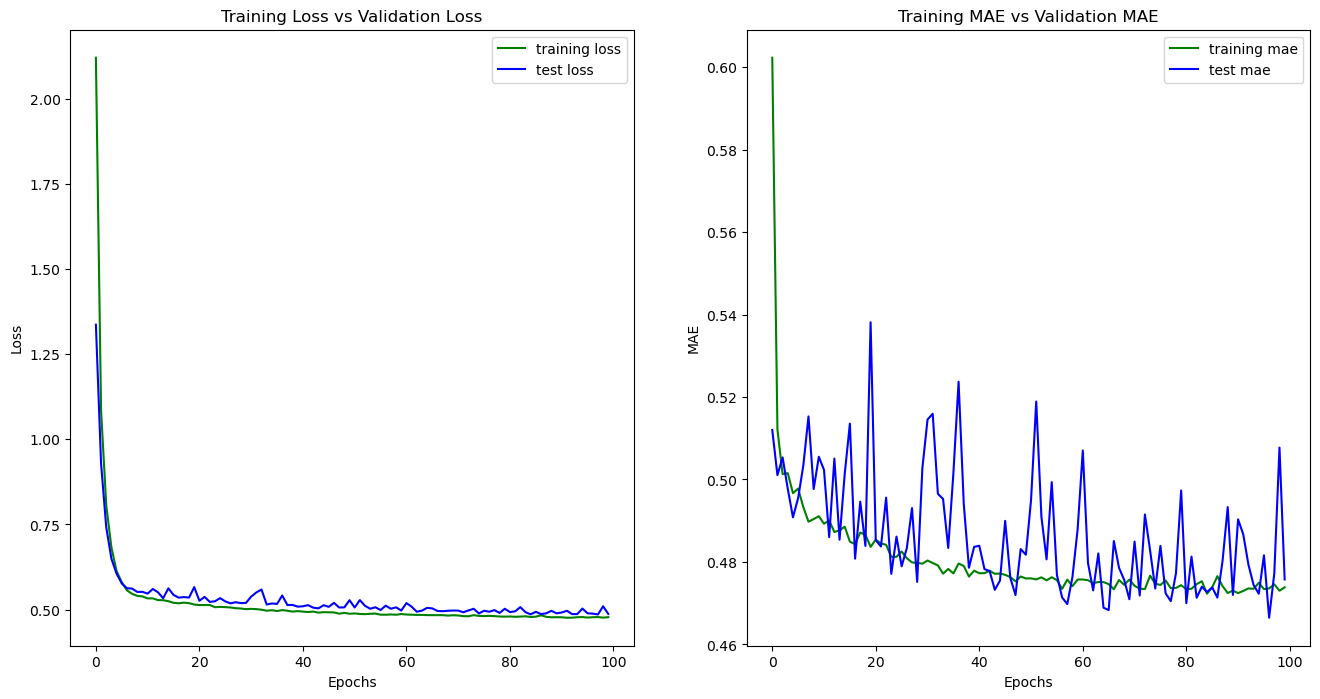

In [60]:
plt.figure(figsize=(16, 8))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss_reg, c='g', label = 'training loss')
plt.plot(validation_loss_reg, c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs Validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(training_mae_reg, c='g', label = 'training mae')
plt.plot(validation_mae_reg, c='b', label ='test mae')
plt.legend();
plt.title('Training MAE vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

### Part 11: Saving the Model

Save your best model in HDF5 format using `model.save(cali_housing.h5)`

In [109]:
from tensorflow.keras.models import save_model
save_model(model_reg, 'cali_housing.keras')